(150, 3)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


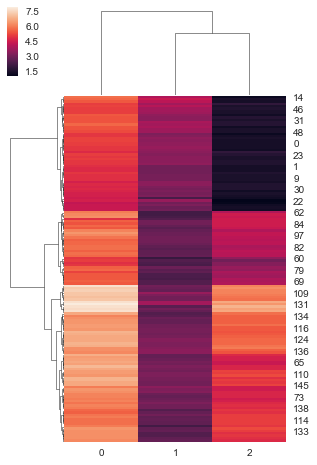

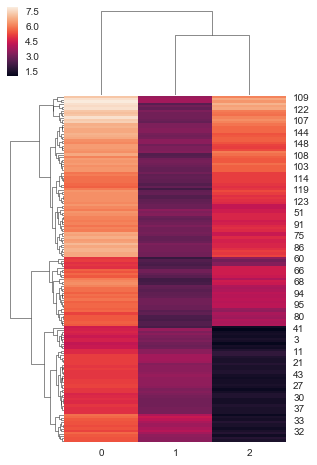

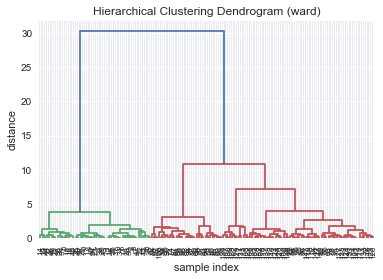

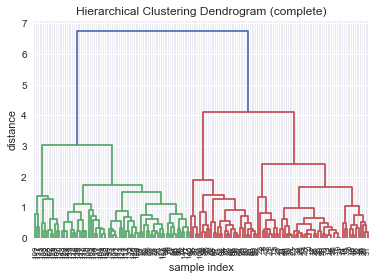

In [2]:
# ***********************************************************
# File: Iris_demo.py
# Course: 17-640 IoT, Big Data, and ML: A Hands-on Approach
# Demonstration: KMeans
# Developer: Chaoyi Jiang
# Date: June 14, 2018
#
# Description:
#
# This script implements a Hierarchical Clustering with various method settings and
# gives a dendrogram of the hierarchical clustering.
#
# Parameters:
# argv[1]: path to the csv file to be analyzed
#
# Dependencies: python 2.7.10
#
# Packages: numpy, sklearn (scikit-learn library), matplotlib
#           scipy
#
# Running commands: python Iris_demo.py argv[1]
# for example, if the Iris.csv file is in the same directory of
# this .py script, you should type in
# python Iris_demo.py Iris.csv
# in the terminal.
# ************************************************************
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
from sklearn import manifold
import time as time
from sklearn.cluster import AgglomerativeClustering
from scipy import ndimage
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage


def read_csv(path):
    """
    This function reads a csv file specified by path. The csv file includes the information of Iris dataset, which
    typically has features and labels for each data point.
    :param path: a string representing the address of the csv file
    :return: a 2D matrix representing the values, and a 1D matrix representing the labels for each training sample
    """
    csv_reader = csv.reader(open(path, 'r'))
    mydata, labels = [], []
    values = []
    for line in csv_reader:
        values.append(line)
    values = np.array(values)
    mydata = values[1:, :-1]
    mydata = []
    for i in range(1, len(values)):
        temp = []
        for j in range(0, len(values[0])-1):
            temp.append(float(values[i][j]))
        mydata.append(temp)

    labels = values[1:, -1]
    mydata = np.array(mydata)
    labels = np.array(labels)
    print(mydata.shape)
    return mydata, labels


if __name__ == '__main__':
 #   path = sys.argv[1]
    path = 'C:/17640/DataSets/Iris.csv'
    X, y = read_csv(path)

    # find distance matrix
    d = distance_matrix(X, X)
    for link in ('ward', 'average', 'complete'):
        clustering = AgglomerativeClustering(linkage=link, n_clusters=10).fit(d)
        st = time.time()
        label = clustering.labels_
        elapsed_time = time.time() - st

    # Draw the clustering heatmap based on different methods
    sns.set(color_codes=True)
    g1 = sns.clustermap(X, method='ward', metric='euclidean', figsize=(5, 8))
    g2 = sns.clustermap(X, method='complete', metric='euclidean', figsize=(5, 8))

    # Draw the dendrogram of the clustering based on different methods
    plt.figure()
    plt.title('Hierarchical Clustering Dendrogram (ward)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    Z = linkage(X, 'ward')
    dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=8.,
    )

    plt.figure()
    plt.title('Hierarchical Clustering Dendrogram (complete)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    Z = linkage(X, 'complete')
    dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=8.,
    )
    plt.show()
